# Klassifikator für MNIST Datensatz mit einem künstlichen neuronalen Netz

## Bibliotheken und Pakete einbinden

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers

## Datensatz als Trainings- und Testdaten laden

In [107]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

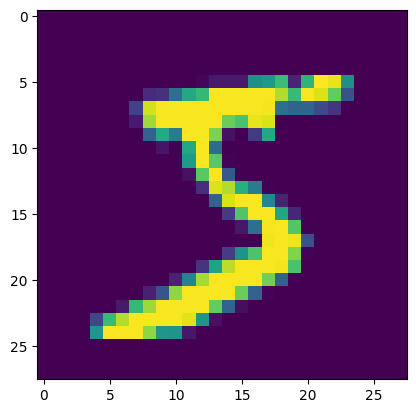

In [108]:
plt.imshow(x_train[0])
plt.show()

In [109]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## X-Werte normalisieren

In [110]:
# Werte liegen zwischen 0 und 255, da die Pixel in 256 Graustufen unterteilt sind
x_train = x_train/255.0
x_test = x_test/255.0

## One hot encoding

In [111]:
# Die Label sind Zahlen zwischen 0 und 9 und sollen binär dargestellt werden als Vektor mit 10 Einträgen,
# sodass an genau der Stelle eine 1 steht, an der Index = Label, ansonsten 0

y_train_1hot = to_categorical(y_train)
y_test_1hot = to_categorical(y_test)

In [112]:
print(y_train_1hot.shape)
print(y_test_1hot.shape)

(60000, 10)
(10000, 10)


In [113]:
print(y_train_1hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Linearisieren

In [114]:
# 28 x 28 Pixel als gespeicherte Matrix wird in Array umgewandelt, die Zeilen werden hintereinander geschrieben,
# Arry hat somit 28*28 = 784 Einträge

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Modell definieren

In [115]:
# Modell hat zwei Layer
# Aktivierungsfunktionen sind Relu und Softmax in der Ausgabeschicht (liefert Wahrscheinlichkeit)

model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (784,)))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
# Trainingsstrategie
# Optimizer gibt an wie duie Gewichte angepasst werden
# loss ist die Verlustfunktion (misst den Fehler)
# metrics zeigt Training an
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Training

In [117]:
# das eigentliche Training 
# 128 Trainingsdaten in 5 Durchläufen
model.fit(x_train, y_train_1hot, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9232 - loss: 0.2641
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9682 - loss: 0.1080
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9787 - loss: 0.0708
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9848 - loss: 0.0517
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9883 - loss: 0.0394
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9909 - loss: 0.0295
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9937 - loss: 0.0221
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9954 - loss: 0.0165
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9963 - loss: 0.0133
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9976 - loss: 0.0099


## Auswertung des fertigen Modells durch die Testdaten

In [118]:

test_loss, test_acc = model.evaluate(x_test, y_test_1hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9816 - loss: 0.0640


## Modell ausprobieren

In [129]:
# zum Beispiel 23.Bild aus den testdaten

x = x_test[23].reshape (1,784)
x = x/255.0
y = y_test[23]

prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [130]:

print('Vorhersage Modell:',np.argmax(prediction))
print('Label:', y)

Vorhersage Modell: 5
Label: 5
